In [1]:
base_path = "/content/drive/MyDrive"

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Suppress only FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Suppress only DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns


# Set options to control the display of DataFrames
pd.set_option('display.max_rows', 100)         # Number of rows to display
pd.set_option('display.max_columns', 50)       # Number of columns to display
pd.set_option('display.max_colwidth', 500)    # Maximum width of each column
pd.set_option('display.width', 10000)          # Width of the display in characters

# **Importing the Merged Modalities**


1.  df_clinicalNotes_diag_proc  ( From ClinicalNotes+MedicalCodes_modality.ipynb)

2.  df_demographic_modality     ( From demographics_modality.ipynb)



In [ ]:
# ( From ClinicalNotes+MedicalCodes_modality.ipynb)
df_clinicalNotes_diag_proc = pd.read_csv(f"{base_path}/BM7/Dissertation/Datasets/merged_report_diag_proc.csv")

# Demographic data of patients  (( From demographics_modality.ipynb))
df_demographic_modality = pd.read_csv(f"{base_path}/BM7/Dissertation/Datasets/demographic_modality.csv")

In [ ]:
df_clinicalNotes_diag_proc.head()

,ROW_ID_diag,SUBJECT_ID_diag,HADM_ID,SEQ_NUM_diag,ICD9_CODE_diag,ROW_ID_proc,SUBJECT_ID_proc,SEQ_NUM_proc,ICD9_CODE_proc,ROW_ID,SUBJECT_ID,CHARTDATE,CATEGORY,DESCRIPTION,TEXT
0,1297,109,172335,1.0,40301,142433,109,1,5498,14797,109,2141-09-24,Discharge summary,Report,"Admission Date: [**2141-9-18**] Discharge Date: [**2141-9-24**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ..."
1,1311,109,173633,1.0,40301,149210,109,1,3995,14801,109,2141-12-14,Discharge summary,Report,Admission Date: [**2141-12-8**] Discharge Date: [**2141-12-14**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 8104**]\nChief Complaint:\nabdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]\n\nHistory of Present Illness:\nMs [**Known lastname **] is a 24 year old woman with a history of CKD V (on HD)\nfrom lupus nephritis...
2,1488,112,174105,1.0,53100,74432,112,1,4443,54002,112,2194-06-18,Discharge summary,Report,"Admission Date: [**2194-6-13**] Discharge Date: [**2194-6-18**]\n\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a [**Age over 90 **]-year-old man\nwith a history of peptic ulcer disease, coronary artery\ndisease, status post myocardial infarction in [**2179**] as well as\n[**2193**], temporal arteritis, who presented with melenas and\nchest pain. The patient reported melanotic stools times 5\nsince 4 p.m. on the day prior to admission. No hematemesis or\nhematochezia. ..."
3,1493,113,109976,1.0,1915,60682,113,1,159,10256,113,2140-12-27,Discharge summary,Report,"Admission Date: [**2140-12-12**] Discharge Date: [**2140-12-27**]\n\nDate of Birth: [**2105-2-9**] Sex: M\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a 35 year old\ngentleman who woke up with severe headache, woke up with a\n[**11-20**] frontal headache that was constant. Took Advil and\nTylenol without relief. Headache persisted. He went to an\noutside hospital, where an MRI of the brain showed\nhydrocephalus and a cystic mass around the pineal gland. Th..."
4,1496,114,178393,1.0,41401,3215,114,1,3612,10754,114,2146-09-03,Discharge summary,Report,Admission Date: [**2146-8-29**] Discharge Date: [**2146-9-3**]\n\nDate of Birth: [**2098-5-9**] Sex: M\n\nService: Cardiothoracic Surgery\n\nADMITTING DIAGNOSIS: Coronary artery disease requiring\nrevascularization.\n\nHISTORY OF PRESENT ILLNESS: This is a 48-year-old man in\ngenerally good health with a new onset of dyspnea on exertion\nand angina who underwent a cardiac catheterization on [**8-29**]\nwhich revealed two vessel coronary artery disease with an\nejection fr...


In [ ]:
df_clinicalNotes_diag_proc.shape

(46809, 15)

In [ ]:
df_clinicalNotes_diag_proc.nunique()

ROW_ID_diag        46809
SUBJECT_ID_diag    37438
HADM_ID            46809
SEQ_NUM_diag           1
ICD9_CODE_diag      2562
ROW_ID_proc        46809
SUBJECT_ID_proc    37438
SEQ_NUM_proc           1
ICD9_CODE_proc      1257
ROW_ID             46809
SUBJECT_ID         37438
CHARTDATE          26093
CATEGORY               1
DESCRIPTION            1
TEXT               46809
dtype: int64

In [ ]:
df_demographic_modality.head()

,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,AGE_AT_ADMISSION,AGE_AT_DEATH,ADMITTIME,DISCHTIME,ADMISSION_TYPE,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,ICUSTAY_ID,LOS_ICU
0,58526,100001,0,2082-03-21,NaN,35,NaN,2117-09-11 11:46:00,2117-09-17 16:45:00,EMERGENCY,DIABETIC KETOACIDOSIS,0,275225,4.2567
1,54610,100003,1,2090-05-19,2150-12-28,59,60.0,2150-04-17 15:34:00,2150-04-21 17:30:00,EMERGENCY,UPPER GI BLEED,0,209281,1.9425
2,9895,100006,0,2059-05-07,2109-10-24,48,50.0,2108-04-06 15:49:00,2108-04-18 17:18:00,EMERGENCY,COPD FLARE,0,291788,4.9776
3,23018,100007,0,2071-06-04,NaN,73,NaN,2145-03-31 05:33:00,2145-04-07 12:40:00,EMERGENCY,BOWEL OBSTRUCTION,0,217937,4.0998
4,533,100009,1,2101-07-30,NaN,60,NaN,2162-05-16 15:56:00,2162-05-21 13:37:00,EMERGENCY,CORONARY ARTERY DISEASE,0,253656,2.4908


In [ ]:
df_demographic_modality.shape

(57786, 14)

In [ ]:
df_demographic_modality.nunique()

SUBJECT_ID              46476
HADM_ID                 57786
GENDER                      2
DOB                     32523
DOD                     12897
AGE_AT_ADMISSION           89
AGE_AT_DEATH               99
ADMITTIME               57500
DISCHTIME               57488
ADMISSION_TYPE              4
DIAGNOSIS               15249
HOSPITAL_EXPIRE_FLAG        2
ICUSTAY_ID              57786
LOS_ICU                 38201
dtype: int64

# Merge Both dataframes on Hospital Admission ID ( demographic and Discharge_Notes_Clinical_Codes )

In [ ]:
# Check for duplicates in the original DataFrames
print("Duplicate rows in df_clinicalNotes_diag_proc:", df_clinicalNotes_diag_proc.duplicated().sum())
print("Duplicate rows in df_demographic_modality:", df_demographic_modality.duplicated().sum())

Duplicate rows in df_clinicalNotes_diag_proc: 0
Duplicate rows in df_demographic_modality: 0


In [ ]:
# Check unique counts
print("Unique SUBJECT_ID in df_clinicalNotes_diag_proc:", df_clinicalNotes_diag_proc['SUBJECT_ID'].nunique())
print("Unique HADM_ID in df_clinicalNotes_diag_proc:", df_clinicalNotes_diag_proc['HADM_ID'].nunique())

print("Unique SUBJECT_ID in df_demographic_modality:", df_demographic_modality['SUBJECT_ID'].nunique())
print("Unique HADM_ID in df_demographic_modality:", df_demographic_modality['HADM_ID'].nunique())

Unique SUBJECT_ID in df_clinicalNotes_diag_proc: 37461
Unique HADM_ID in df_clinicalNotes_diag_proc: 46841
Unique SUBJECT_ID in df_demographic_modality: 46476
Unique HADM_ID in df_demographic_modality: 57786


In [ ]:
# Merge DataFrames
merged_df = pd.merge(df_clinicalNotes_diag_proc, df_demographic_modality, on=['HADM_ID'], how='inner')

# Display the merged DataFrame
merged_df.head(3)

,ROW_ID_diag,SUBJECT_ID_diag,HADM_ID,SEQ_NUM_diag,ICD9_CODE_diag,ROW_ID_proc,SUBJECT_ID_proc,SEQ_NUM_proc,ICD9_CODE_proc,ROW_ID,SUBJECT_ID_x,CHARTDATE,CATEGORY,DESCRIPTION,TEXT,SUBJECT_ID_y,GENDER,DOB,DOD,AGE_AT_ADMISSION,AGE_AT_DEATH,ADMITTIME,DISCHTIME,ADMISSION_TYPE,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,ICUSTAY_ID,LOS_ICU
0,1297,109,172335,1.0,40301,142433,109,1,5498,14797,109,2141-09-24,Discharge summary,Report,"Admission Date: [**2141-9-18**] Discharge Date: [**2141-9-24**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ...",109,0,2117-08-07,2142-08-30,24,25.0,2141-09-18 10:32:00,2141-09-24 13:53:00,EMERGENCY,LEG PAIN,0,262652,2.0418
1,1311,109,173633,1.0,40301,149210,109,1,3995,14801,109,2141-12-14,Discharge summary,Report,Admission Date: [**2141-12-8**] Discharge Date: [**2141-12-14**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 8104**]\nChief Complaint:\nabdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]\n\nHistory of Present Illness:\nMs [**Known lastname **] is a 24 year old woman with a history of CKD V (on HD)\nfrom lupus nephritis...,109,0,2117-08-07,2142-08-30,24,25.0,2141-12-08 01:40:00,2141-12-14 17:16:00,EMERGENCY,ABDOMINAL PAIN,0,284204,1.8098
2,1488,112,174105,1.0,53100,74432,112,1,4443,54002,112,2194-06-18,Discharge summary,Report,"Admission Date: [**2194-6-13**] Discharge Date: [**2194-6-18**]\n\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a [**Age over 90 **]-year-old man\nwith a history of peptic ulcer disease, coronary artery\ndisease, status post myocardial infarction in [**2179**] as well as\n[**2193**], temporal arteritis, who presented with melenas and\nchest pain. The patient reported melanotic stools times 5\nsince 4 p.m. on the day prior to admission. No hematemesis or\nhematochezia. ...",112,1,1894-06-13,2196-09-29,300,302.0,2194-06-13 18:39:00,2194-06-18 16:50:00,EMERGENCY,GASTROINTESTINAL BLEED,0,289222,0.8402


In [ ]:
merged_df['TEXT'][0]

"Admission Date:  [**2141-9-18**]              Discharge Date:   [**2141-9-24**]\n\nDate of Birth:  [**2117-8-7**]             Sex:   F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] following admission for the same\ncomplaints.\n.\nPatient took her hydralazine dose on am of admission. BP at\npresentation to the ER was 250/140 (The patient reportedly has\nbaseline SBPs in 130-170s) She was given 900 labetolol and 50\nhydralazine in the ED. BP following this was 175/124. Her EKG\nwas unchanged. K was 5.7.\n.\nPatient also complaining of [**10-20**] right hip pain. Patient was\nd/ced on [**9-14**] with oral dilaudid for hip/leg pain. She took this\nonly for one day due to severe 

In [ ]:
merged_df['DIAGNOSIS'].value_counts()

DIAGNOSIS
NEWBORN                                  3423
PNEUMONIA                                1159
SEPSIS                                   1035
CORONARY ARTERY DISEASE                   827
CONGESTIVE HEART FAILURE                  705
                                         ... 
NON Q MI;CORONARY ARTERY DISEASE\CATH       1
RENAL CELL CARCINOMA\INTERLEUKIN-2          1
INFECTED RIGHT THIGH GRAFT                  1
S/P KIDNEY TX                               1
INTRACRANIAL HEMORRHAGE;ANEURYSM            1
Name: count, Length: 13746, dtype: int64

In [ ]:
merged_df.shape

(46038, 28)

### EDA

<ipython-input-17-bc5af7e81859>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='HOSPITAL_EXPIRE_FLAG', palette='viridis')


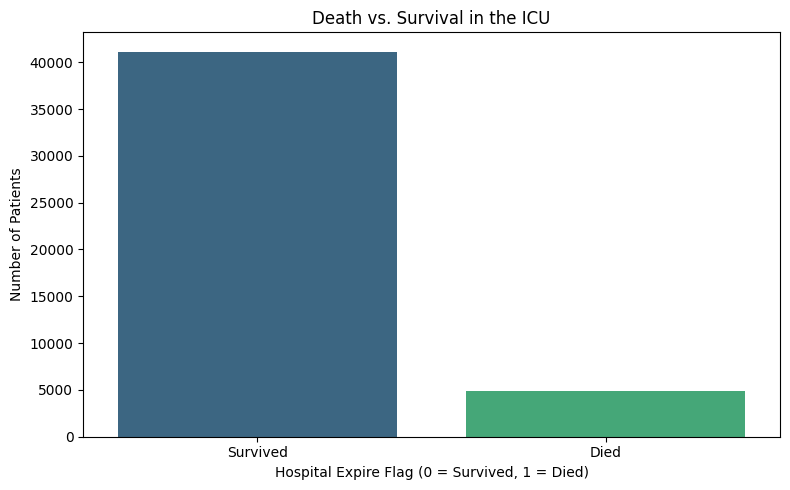

In [ ]:
# Bar plot for Death vs. Survival in the ICU
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='HOSPITAL_EXPIRE_FLAG', palette='viridis')
plt.title('Death vs. Survival in the ICU')
plt.xlabel('Hospital Expire Flag (0 = Survived, 1 = Died)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Survived', 'Died'])
plt.tight_layout()
plt.show()


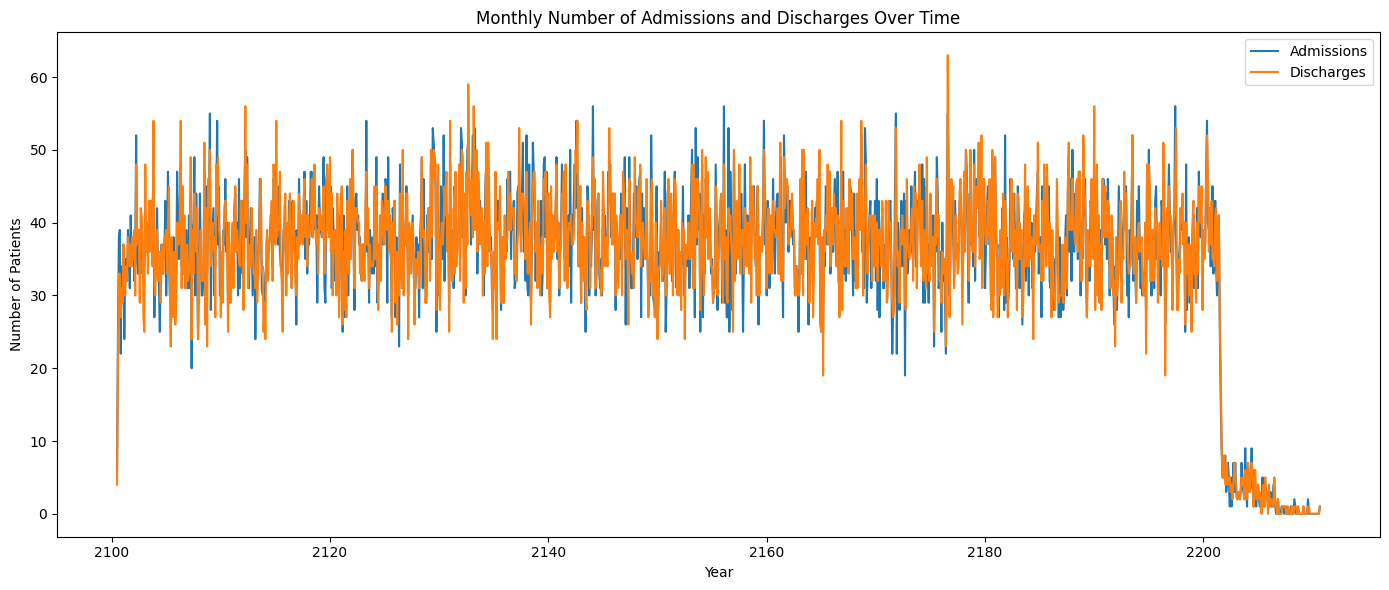

In [ ]:
# Convert 'ADMITTIME' and 'DISCHTIME' to datetime if not already done
merged_df['ADMITTIME'] = pd.to_datetime(merged_df['ADMITTIME'])
merged_df['DISCHTIME'] = pd.to_datetime(merged_df['DISCHTIME'])

# Plotting Admissions Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df.set_index('ADMITTIME').resample('M').size(), label='Admissions')
sns.lineplot(data=merged_df.set_index('DISCHTIME').resample('M').size(), label='Discharges')
plt.title('Monthly Number of Admissions and Discharges Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.legend()
plt.tight_layout()
plt.show()


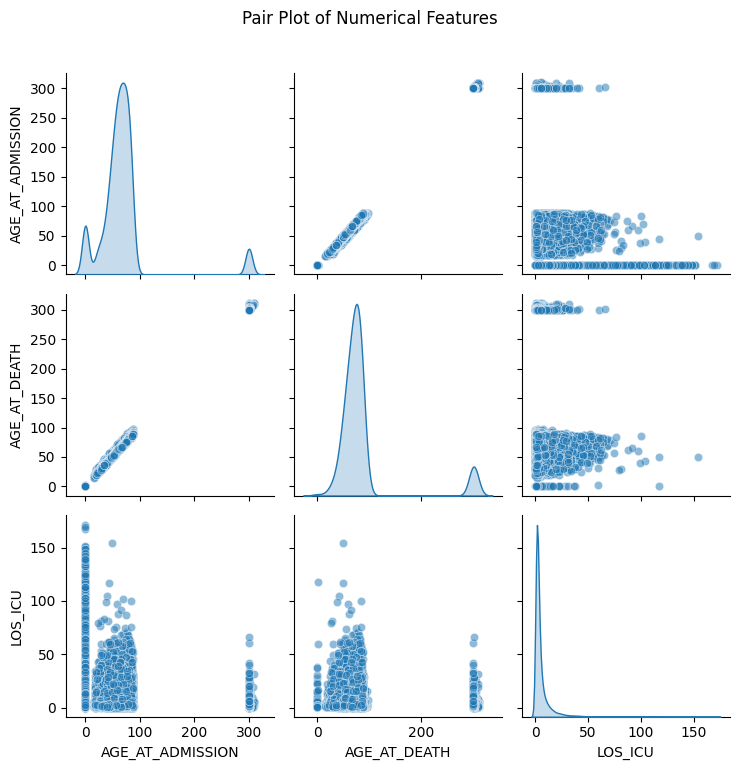

In [ ]:
# Pair plot of numerical features
sns.pairplot(merged_df[['AGE_AT_ADMISSION', 'AGE_AT_DEATH', 'LOS_ICU']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()


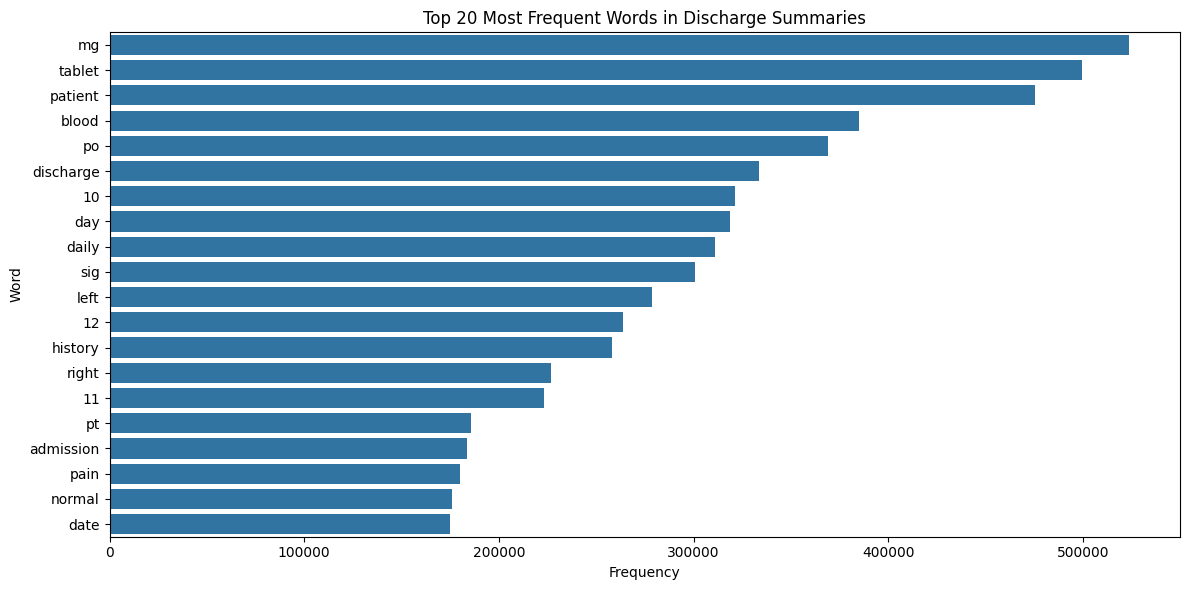

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to get word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(merged_df['TEXT'].dropna())

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame(data={'Word': vectorizer.get_feature_names_out(), 'Frequency': word_counts.toarray().sum(axis=0)})

# Plot the top 20 words
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df.sort_values(by='Frequency', ascending=False), x='Frequency', y='Word')
plt.title('Top 20 Most Frequent Words in Discharge Summaries')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


## **Drop Irrelevant columns**

In [ ]:
merged_df.columns

Index(['ROW_ID_diag', 'SUBJECT_ID_diag', 'HADM_ID', 'SEQ_NUM_diag', 'ICD9_CODE_diag', 'ROW_ID_proc', 'SUBJECT_ID_proc', 'SEQ_NUM_proc', 'ICD9_CODE_proc', 'ROW_ID', 'SUBJECT_ID_x', 'CHARTDATE', 'CATEGORY', 'DESCRIPTION', 'TEXT', 'SUBJECT_ID_y', 'GENDER', 'DOB', 'DOD', 'AGE_AT_ADMISSION', 'AGE_AT_DEATH', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'ICUSTAY_ID', 'LOS_ICU'], dtype='object')

In [ ]:
# Step 1: Define the columns to keep
columns_to_keep = ['SUBJECT_ID_diag', 'HADM_ID', 'GENDER',	'AGE_AT_ADMISSION'	,'ICD9_CODE_diag', 'ICD9_CODE_proc', 'TEXT', 'DIAGNOSIS']  # Adjust this list based on the columns you need

# Step 2: Filter the DataFrame to keep only the relevant columns
filtered_merged_df = merged_df[columns_to_keep]




In [ ]:
filtered_merged_df.head()

,SUBJECT_ID_diag,HADM_ID,GENDER,AGE_AT_ADMISSION,ICD9_CODE_diag,ICD9_CODE_proc,TEXT,DIAGNOSIS
0,109,172335,0,24,40301,5498,"Admission Date: [**2141-9-18**] Discharge Date: [**2141-9-24**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ...",LEG PAIN
1,109,173633,0,24,40301,3995,Admission Date: [**2141-12-8**] Discharge Date: [**2141-12-14**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 8104**]\nChief Complaint:\nabdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]\n\nHistory of Present Illness:\nMs [**Known lastname **] is a 24 year old woman with a history of CKD V (on HD)\nfrom lupus nephritis...,ABDOMINAL PAIN
2,112,174105,1,300,53100,4443,"Admission Date: [**2194-6-13**] Discharge Date: [**2194-6-18**]\n\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a [**Age over 90 **]-year-old man\nwith a history of peptic ulcer disease, coronary artery\ndisease, status post myocardial infarction in [**2179**] as well as\n[**2193**], temporal arteritis, who presented with melenas and\nchest pain. The patient reported melanotic stools times 5\nsince 4 p.m. on the day prior to admission. No hematemesis or\nhematochezia. ...",GASTROINTESTINAL BLEED
3,113,109976,1,35,1915,159,"Admission Date: [**2140-12-12**] Discharge Date: [**2140-12-27**]\n\nDate of Birth: [**2105-2-9**] Sex: M\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a 35 year old\ngentleman who woke up with severe headache, woke up with a\n[**11-20**] frontal headache that was constant. Took Advil and\nTylenol without relief. Headache persisted. He went to an\noutside hospital, where an MRI of the brain showed\nhydrocephalus and a cystic mass around the pineal gland. Th...",HYDROCEPHALUS
4,114,178393,1,48,41401,3612,Admission Date: [**2146-8-29**] Discharge Date: [**2146-9-3**]\n\nDate of Birth: [**2098-5-9**] Sex: M\n\nService: Cardiothoracic Surgery\n\nADMITTING DIAGNOSIS: Coronary artery disease requiring\nrevascularization.\n\nHISTORY OF PRESENT ILLNESS: This is a 48-year-old man in\ngenerally good health with a new onset of dyspnea on exertion\nand angina who underwent a cardiac catheterization on [**8-29**]\nwhich revealed two vessel coronary artery disease with an\nejection fr...,USA/SDA


In [ ]:
filtered_merged_df.shape

(46038, 8)

# Export the Final Merged Dataset
(Ready for further preprocessing)

In [ ]:
filtered_merged_df.to_csv(f"{base_path}/BM7/Dissertation/Final_Datasets/Final_Merged_Dataset_before_NLP.csv",index=False)